In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted


In [66]:
df = pd.read_csv("/Data to analyze/test.csv")

In [67]:
df.drop(columns = ["Unnamed: 0", "review_date", "Name", "route", "trip_verified","date_flown"], inplace = True)
df.replace('None', np.nan, inplace=True)
df.dropna(inplace=True)
df["recommended"] = (df["recommended"] == "yes").astype(int)

#change country
other_count = df["location"].value_counts()
other_countries = other_count[other_count < 30].index.tolist()
df["location"] = df["location"].apply(lambda x: " (Other)" if x in other_countries else x)

# turn overall review into int
df["overall_review"] = df["overall_review"].astype(int)
pd.DataFrame(df)

,location,overall_review,type_of_traveller,seat_type,seat_comfort_review,cabin_service_review,food_and_beverage_review,inflight_entertainment,ground_service,wifi_review,value_for_money,recommended
0,(United States),5,Couple Leisure,Economy Class,1,4,2,0,2,0,2,0
1,(United States),1,Family Leisure,Economy Class,2,5,2,3,4,1,1,0
2,(Other),3,Solo Leisure,Economy Class,2,1,1,1,2,1,2,0
3,(United Kingdom),4,Business,Business Class,3,3,4,0,3,1,2,0
4,(United Kingdom),3,Family Leisure,Economy Class,4,4,0,1,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2757,(United Kingdom),7,Business,Business Class,4,5,4,3,0,0,5,1
2758,(United Kingdom),5,Business,Business Class,4,2,3,4,0,0,3,1
2759,(United Kingdom),3,Business,Premium Economy,4,1,1,3,0,0,3,0
2760,(United Kingdom),7,Business,Business Class,2,5,2,3,0,0,3,1


In [75]:
target = "overall_review"
X_train = df.drop(columns=target)
y_train = df[target]

In [77]:
y_mean = y_train.mean()
y_pred_mae = [y_mean]*len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred_mae)
baseline_mae

2.786088850079236

In [87]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['location', 'type_of_traveller',
                                     'seat_type'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [88]:
y_pred_training = model.predict(X_train)
new_mae = mean_absolute_error(y_train, y_pred_training)
new_mae

0.8272974287493796

In [90]:
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_

In [91]:
intercept

-0.3443148621851524

In [92]:
coefficients

array([ 3.92194195e-02,  1.00912619e-01,  9.33958435e-02,  1.07862456e-02,
        1.99560049e-01, -1.89728767e-01, -1.33880127e-01, -1.20265283e-01,
        9.83158172e-03, -1.26935465e-02,  5.67199860e-02, -5.38580212e-02,
       -1.74651625e-01, -5.15809558e-04, -8.32498568e-03,  1.83492421e-01,
        2.24572606e-01,  1.57354077e-01,  1.56995849e-01, -2.07229835e-02,
        2.78795337e-01,  7.93995469e-03,  7.14321053e-01,  2.21975473e+00])

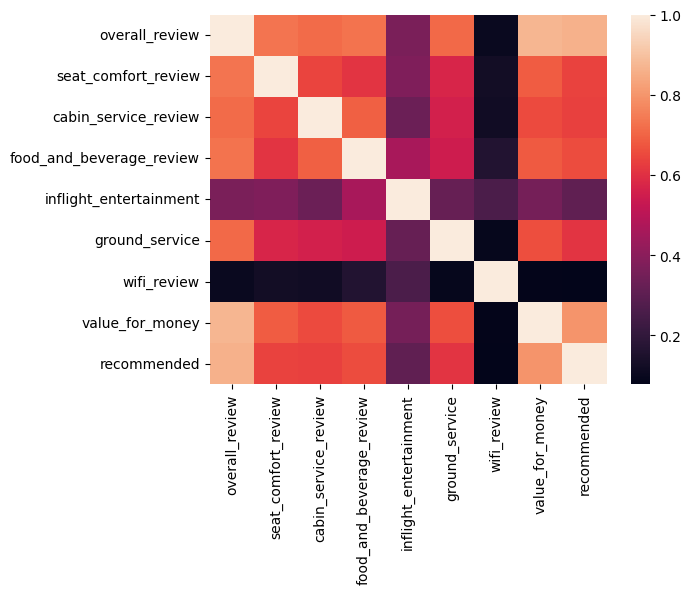

In [74]:
correlation = df.select_dtypes("number").corr()
sns.heatmap(correlation)
plt.savefig('/Data to analyze/heatmap.png')


Text(0.5, 1.0, 'wifi review')

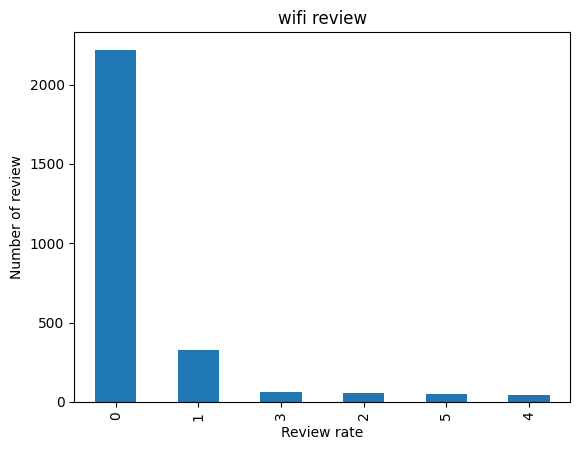

In [48]:
df["wifi_review"].value_counts().plot(kind="bar")
plt.xlabel("Review rate")
plt.ylabel("Number of review")
plt.title("wifi review")

Text(0.5, 1.0, "Customer's Citizenship")

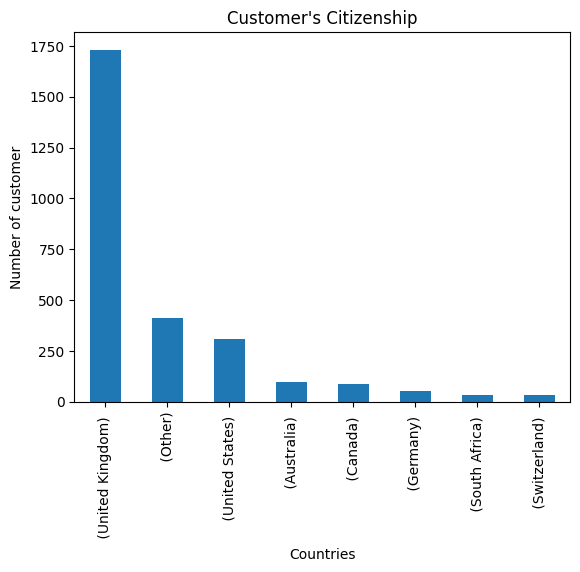

In [71]:
df["location"].value_counts().plot(kind="bar")
plt.xlabel("Countries")
plt.ylabel("Number of customer")
plt.title("Customer's Citizenship")

Text(0.5, 1.0, 'Custmers seat type')

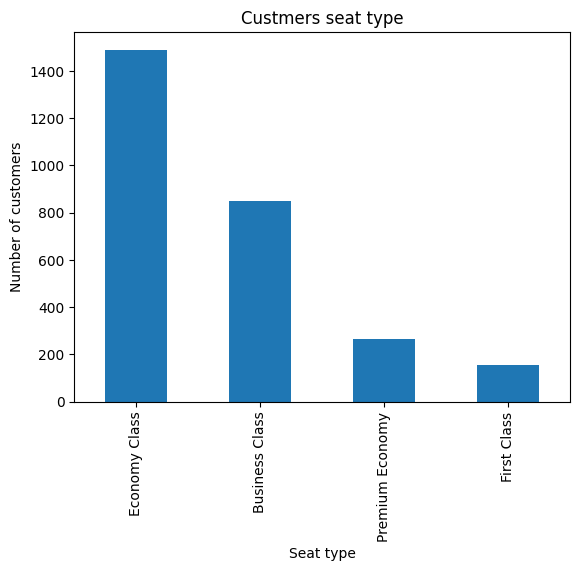

In [72]:
df["seat_type"].value_counts().plot(kind="bar")
plt.xlabel("Seat type")
plt.ylabel("Number of customers")
plt.title("Custmers seat type")

Text(0.5, 1.0, 'Custmers Type of Traveller')

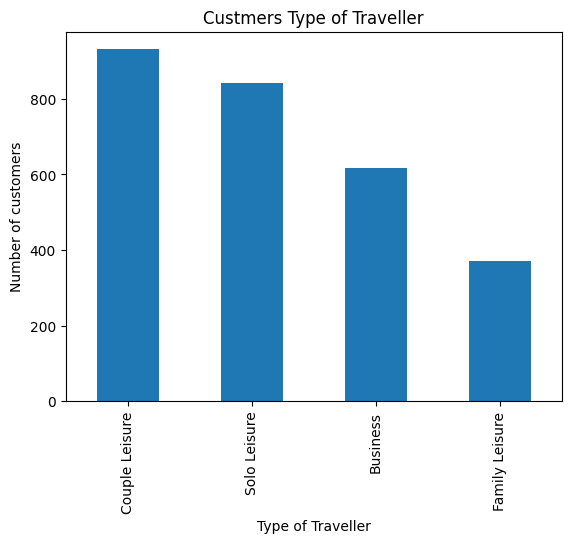

In [73]:
df["type_of_traveller"].value_counts().plot(kind="bar")
plt.xlabel("Type of Traveller")
plt.ylabel("Number of customers")
plt.title("Custmers Type of Traveller")